In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
%matplotlib inline


In [7]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X = mnist['data'].astype('float32') / 255.0

# X = X[:5000]
print(f"Dataset shape: {X.shape}")

Dataset shape: (70000, 784)


In [8]:
latent_dim = 50

#  PCA
pca = PCA(n_components=latent_dim)
X_pca = pca.fit_transform(X)
X_recon_pca = pca.inverse_transform(X_pca)
mse_pca = mean_squared_error(X, X_recon_pca)
print(f"PCA Reconstruction MSE: {mse_pca:.6f}")

PCA Reconstruction MSE: 0.011746


In [10]:
# PPCA

pca_full = PCA()
pca_full.fit(X)
eigenvalues = pca_full.explained_variance_
mean_ = pca_full.mean_


#  sigma^2 as average of remaining eigenvalues
sigma2 = np.mean(eigenvalues[latent_dim:])
print(f"PPCA Sigma^2: {sigma2:.6f}")

PPCA Sigma^2: 0.012546


In [11]:
# Eigenvectors
U = pca_full.components_[:latent_dim].T

# shrinkage factors
shrink_factors = (eigenvalues[:latent_dim] - sigma2) / eigenvalues[:latent_dim]

diag_shrink = np.diag(shrink_factors)

# Projection matrix for PPCA reconstruction
P = U @ diag_shrink @ U.T

# using PPCA
X_centered = X - mean_
X_recon_ppca = mean_ + np.dot(X_centered, P.T)  # P is symmetric

mse_ppca = mean_squared_error(X, X_recon_ppca)
print(f"PPCA Reconstruction MSE: {mse_ppca:.6f}")

PPCA Reconstruction MSE: 0.011771


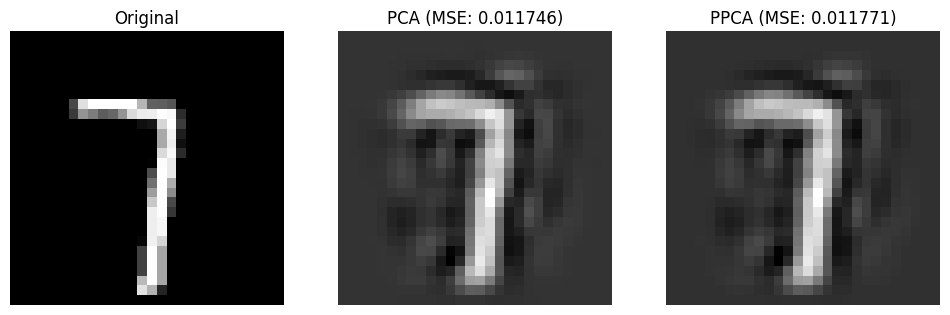

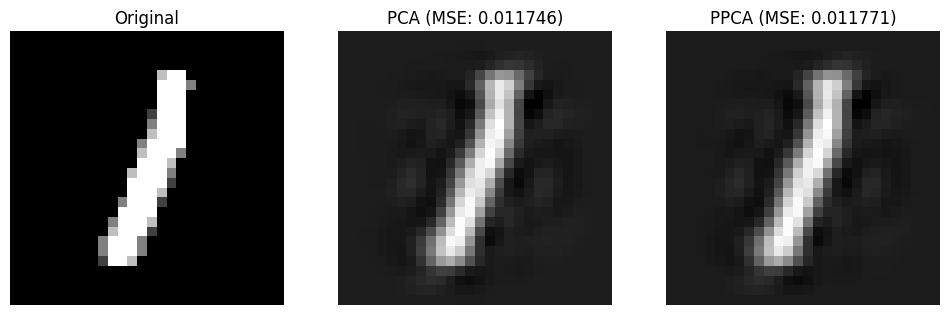

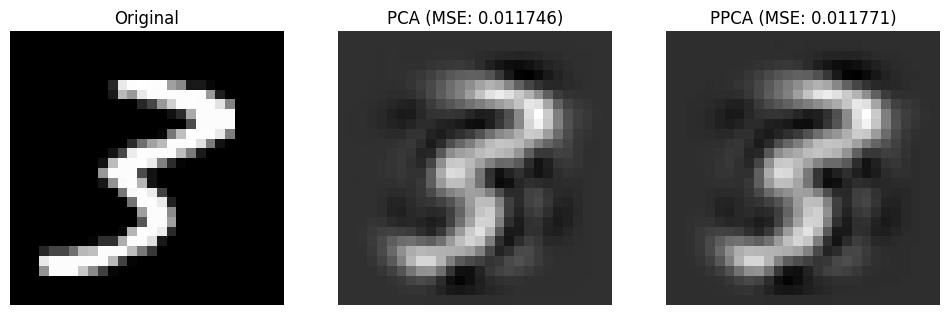

In [12]:

def plot_reconstructions(idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(X[idx].reshape(28, 28), cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(X_recon_pca[idx].reshape(28, 28), cmap='gray')
    axes[1].set_title(f'PCA (MSE: {mse_pca:.6f})')
    axes[1].axis('off')

    axes[2].imshow(X_recon_ppca[idx].reshape(28, 28), cmap='gray')
    axes[2].set_title(f'PPCA (MSE: {mse_ppca:.6f})')
    axes[2].axis('off')

    plt.show()

# Plot for a few random indices
for i in np.random.randint(0, len(X), 3):
    plot_reconstructions(i)

PCA Reconstruction PSNR: 19.301082
PPCA Reconstruction PSNR: 19.291871


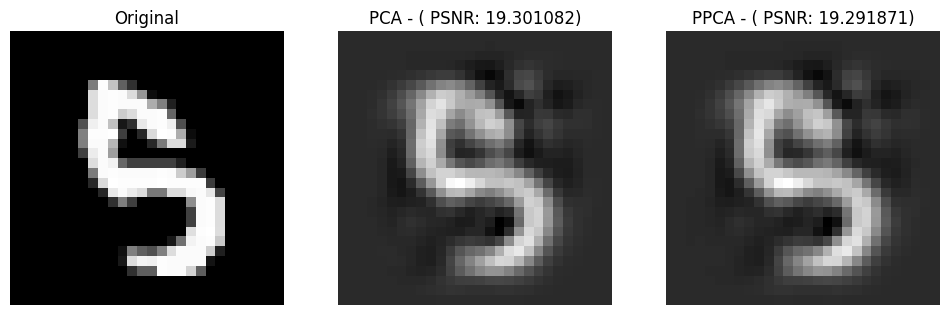

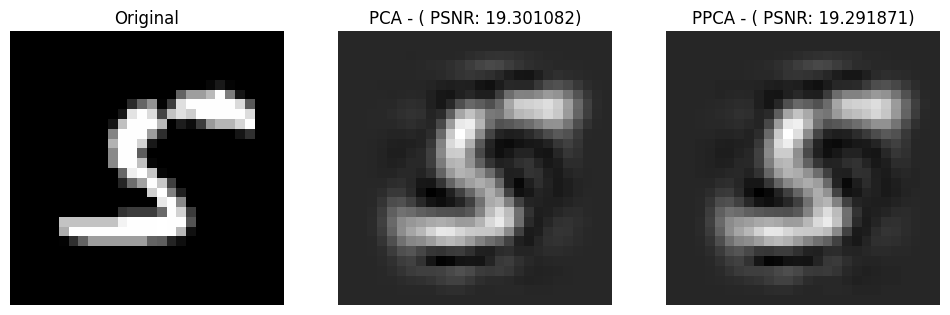

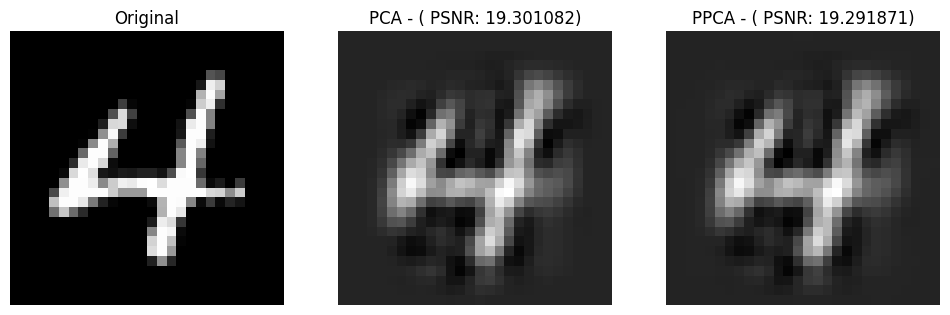

In [15]:
from skimage.metrics import peak_signal_noise_ratio

# PSNR
def calculate_psnr(original, reconstructed):
    return peak_signal_noise_ratio(original, reconstructed, data_range=1)

psnr_pca = calculate_psnr(X, X_recon_pca)
psnr_ppca = calculate_psnr(X, X_recon_ppca)

print(f"PCA Reconstruction PSNR: {psnr_pca:.6f}")
print(f"PPCA Reconstruction PSNR: {psnr_ppca:.6f}")

def plot_reconstructions_with_psnr(idx=0):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(X[idx].reshape(28, 28), cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(X_recon_pca[idx].reshape(28, 28), cmap='gray')
    axes[1].set_title(f'PCA - ( PSNR: {psnr_pca:.6f})')
    axes[1].axis('off')

    axes[2].imshow(X_recon_ppca[idx].reshape(28, 28), cmap='gray')
    axes[2].set_title(f'PPCA - ( PSNR: {psnr_ppca:.6f})')
    axes[2].axis('off')

    plt.show()

for i in np.random.randint(0, len(X), 3):
    plot_reconstructions_with_psnr(i)